In [112]:
#Import neccessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [197]:
#Read in the different datasets
#Read in store
store=pd.read_csv('../data/store.csv')
#Read in test data
test=store_data=pd.read_csv('../data/test.csv')

#Read in train data 
train=store_data=pd.read_csv('../data/train.csv')

#Read in sample submission 
sample_submission=store_data=pd.read_csv('../data/sample_submission.csv')

train.shape, test.shape, store.shape

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((1017209, 9), (41088, 8), (1115, 10))

In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [198]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [97]:
sample_submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
#Add new columns 
def add_colums(df):
    df.Date = pd.to_datetime(df.Date)
    df['Day'] = df.Date.dt.day
    df['Month'] = df.Date.dt.month
    df['Year'] = df.Date.dt.year
    df['Weekday'] = df.Date.dt.weekday
    df['Month_start'] = df.Date.dt.is_month_start
    df['Month_end'] = df.Date.dt.is_month_end

    return df

In [130]:
train_modified=add_colums(train)
train_modified.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,4,False,True
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,4,False,True
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,4,False,True
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,4,False,True
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,4,False,True


In [150]:
#encode data 
def encode_data(df):
    #month_start_encoder = preprocessing.LabelEncoder()
    ##month_end_encoder = preprocessing.LabelEncoder()
    date_encoder = preprocessing.LabelEncoder()
    #state_hol_encoder = preprocessing.LabelEncoder()
    #day_encoder = preprocessing.LabelEncoder()
    #month_encoder = preprocessing.LabelEncoder()
    #year_encoder = preprocessing.LabelEncoder()
    #weekday_encoder = preprocessing.LabelEncoder()
    open_encoder = preprocessing.LabelEncoder()
    
    #df['Month_start'] = month_start_encoder.fit_transform(df['Month_start'])
    #df['Month_end'] = month_end_encoder.fit_transform(df['Month_end'])
    df['Date'] = date_encoder.fit_transform(df['Date'])
    #df['Day'] = day_encoder.fit_transform(df['Day'])
    #df['Month'] = month_encoder.fit_transform(df['Month'])
    #df['Year'] = year_encoder.fit_transform(df['Year'])
    #df['Weekday'] = weekday_encoder.fit_transform(df['Weekday'])
    df['Open'] = open_encoder.fit_transform(df['Open'])
    return df

In [151]:
train_encoded=encode_data(train_modified)
train_encoded

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,5,941,5263,555,1,1,0,1,31,7,2015,4,False,True
1,2,5,941,6064,625,1,1,0,1,31,7,2015,4,False,True
2,3,5,941,8314,821,1,1,0,1,31,7,2015,4,False,True
3,4,5,941,13995,1498,1,1,0,1,31,7,2015,4,False,True
4,5,5,941,4822,559,1,1,0,1,31,7,2015,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,0,a,1,1,1,2013,1,True,False
1017205,1112,2,0,0,0,0,0,a,1,1,1,2013,1,True,False
1017206,1113,2,0,0,0,0,0,a,1,1,1,2013,1,True,False
1017207,1114,2,0,0,0,0,0,a,1,1,1,2013,1,True,False


In [152]:
#drop columns

def drop_col(df,col):
    df=df[df.columns[~df.columns.isin([col])]]
    return df


    
    

In [153]:
col='StateHoliday'
train_clean=drop_col(train_encoded,col)
train_clean

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Day,Month,Year,Weekday,Month_start,Month_end
0,1,5,941,5263,555,1,1,1,31,7,2015,4,False,True
1,2,5,941,6064,625,1,1,1,31,7,2015,4,False,True
2,3,5,941,8314,821,1,1,1,31,7,2015,4,False,True
3,4,5,941,13995,1498,1,1,1,31,7,2015,4,False,True
4,5,5,941,4822,559,1,1,1,31,7,2015,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,0,1,1,1,2013,1,True,False
1017205,1112,2,0,0,0,0,0,1,1,1,2013,1,True,False
1017206,1113,2,0,0,0,0,0,1,1,1,2013,1,True,False
1017207,1114,2,0,0,0,0,0,1,1,1,2013,1,True,False


In [154]:
#select feature columns
def select_features(df):
    feature_col =["DayOfWeek", "Date", "Open","Promo","SchoolHoliday","Day","Month"]
    df =df[feature_col]
    return df


In [155]:
train_data=select_features(train_clean)

In [156]:
train_data

,DayOfWeek,Date,Open,Promo,SchoolHoliday,Day,Month
0,5,941,1,1,1,31,7
1,5,941,1,1,1,31,7
2,5,941,1,1,1,31,7
3,5,941,1,1,1,31,7
4,5,941,1,1,1,31,7
...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,1
1017205,2,0,0,0,1,1,1
1017206,2,0,0,0,1,1,1
1017207,2,0,0,0,1,1,1


In [157]:
target_y =train_clean["Sales"]

In [158]:
target_y

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

In [159]:
#select feature columns
def select_features(df):
    if 'Sales' in df.columns:
        feature_col =["DayOfWeek", "Date", "Open","Promo","SchoolHoliday","Day","Month"]
        features_X =df[feature_col]
        target_y =train_clean["Sales"]
        
        return features_X,target_y
    else:
        feature_col =["DayOfWeek", "Date", "Open","Promo","SchoolHoliday","Day","Month"]
        features_X =df[feature_col]
        return features_X
        
    

In [160]:
features,target=select_features(train_clean)

In [161]:
features

,DayOfWeek,Date,Open,Promo,SchoolHoliday,Day,Month
0,5,941,1,1,1,31,7
1,5,941,1,1,1,31,7
2,5,941,1,1,1,31,7
3,5,941,1,1,1,31,7
4,5,941,1,1,1,31,7
...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,1
1017205,2,0,0,0,1,1,1
1017206,2,0,0,0,1,1,1
1017207,2,0,0,0,1,1,1


In [162]:
#fuction to split the data 
def train_test_val_split(X, Y, split=(0.2, 0.1), shuffle=True):
    """Split dataset into train/val/test subsets by 70:20:10(default).
    
    Args:
      X: List of data.
      Y: List of labels corresponding to data.
      split: Tuple of split ratio in `test:val` order.
      shuffle: Bool of shuffle or not.
      
    Returns:
      Three dataset in `train:test:val` order.
    """
    from sklearn.model_selection import train_test_split
    assert len(X) == len(Y), 'The length of X and Y must be consistent.'
    X_train, X_test_val, y_train, Y_test_val = train_test_split(X, Y, 
        test_size=(split[0]+split[1]), shuffle=shuffle)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, Y_test_val, 
        test_size=split[1], shuffle=False)
    return (X_train, y_train), (X_test, y_test), (X_val, y_val)

In [163]:
#let us split the training data 
#Let us split the data accordingly 

(X_train, y_train), (X_test, y_test), (X_val, y_val)=train_test_val_split(features, target_y)

In [32]:
def  RFR(feature_x, target_y):
    feature_x, target_y = make_regression(n_features=7, n_informative=2, random_state=0, shuffle=False)
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    return regr


In [33]:
model=RFR(features,target_y)

In [164]:
features.dtypes


DayOfWeek        int64
Date             int64
Open             int64
Promo            int64
SchoolHoliday    int64
Day              int64
Month            int64
dtype: object

In [180]:
#random forest regressor pipe 
piperf = Pipeline([
        ('scalar',StandardScaler()),
       
        ('random_forest',RandomForestRegressor(max_depth=2,random_state=2))
        ])

#pipe = pipe.fit(features,target_y)

#decission tree regressor pipe
#pipedt = Pipeline([
      #  ('scalar',StandardScaler()),
       
       # ('decision_forest',DecisionTreeRegressor(max_depth=2,random_state=2))
       # ])


model=piperf.fit(X_train,y_train)
predictions=model.predict(X_test)









In [56]:
#combined pipe 
#pipelines = [piperf,pipedt]

In [57]:
#best_accuracy =0.0
#best_model =0
#best_pipeline=""

In [101]:
#create a dictionary for the pipeline 
#pipe_dict = {0: 'Random Forest regressor', 1: 'DecissionTreeRegressor'}

In [90]:
#check for best model 
#for pipe in pipelines:
 #   pipe.fit(features,target_y)
    #pr=pipe.predict(test_features)
    #print("{} predictions{}".format(pipe_dict[i],pr))
    

In [108]:
#for i,model in enumerate(pipelines):
#    print("{} Predictions : {}".format(pipe_dict[i],pd.DataFrame(pipe.predict(test_features))))
 

In [167]:
#using Mean absolute error as the loss function 
def loss_function(actual, pred):
    mae = mean_absolute_error(actual, pred)
    return mae

mae=loss_function(predictions,y_test)
print("Mean abosulut Error is",mae)

Mean abosulut Error is 1727.7955403289095


In [168]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score
print("The model accuracy is",score)

The model accuracy is 0.5335812852887267


In [174]:

        
result_df = X_test.copy()
result_df["Prediction Sales"] = predictions
result_df["Actual Sales"] = y_test


Daily_sales = result_df.groupby("Day").agg({"Prediction Sales": "mean", "Actual Sales":"mean"})
        
        
    
    

In [176]:
#show prediction sales and actual sales 
Daily_sales

,Prediction Sales,Actual Sales
Day,,
1,4208.757516,4610.843778
2,6356.999164,6972.069762
3,5587.879598,5807.063004
4,6619.152182,6927.101336
5,6388.201835,6303.238885
6,6109.779706,5856.831075
7,6130.126848,6045.524704
8,5812.790477,5640.654109
9,5372.333607,5243.028899


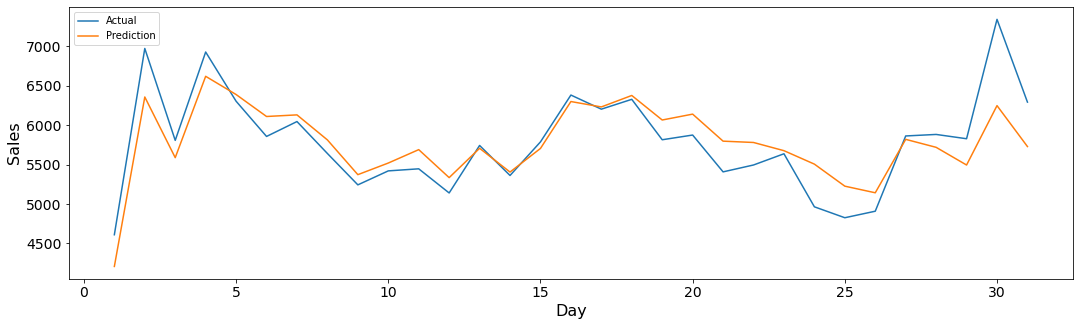

In [177]:
#Show graph of actual sales vs prediction sales per day 

fig = plt.figure(figsize=(18, 5))
sns.lineplot(x = Daily_sales.index, y = Daily_sales["Actual Sales"], label='Actual')
sns.lineplot(x = Daily_sales.index, y = Daily_sales["Prediction Sales"], label='Prediction')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Day", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()
        
        

In [178]:
#Serailize model 
!pip install sklearn-json

You should consider upgrading via the '/Users/rssebudandi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [192]:
# save the model
import time
import pickle

timestr = time.strftime("%d-%m-%y-%H-%M-%S")
timestr
pickle.dump(model, open("../models/"+timestr+".pkl", "wb"))

In [199]:
 #Testing
    # test data
test_modified = add_colums(test)
    # print(test_modified)
test_encoded = encode_data(test_modified)
    # print(train_encoded)
col = 'StateHoliday'
test_clean = drop_col(test_encoded, col)
    # print(train_clean)
test_features = select_features(test_clean)
    # print(train_features)
test_features

,DayOfWeek,Date,Open,Promo,SchoolHoliday,Day,Month
0,4,47,1,1,0,17,9
1,4,47,1,1,0,17,9
2,4,47,1,1,0,17,9
3,4,47,1,1,0,17,9
4,4,47,1,1,0,17,9
...,...,...,...,...,...,...,...
41083,6,0,1,0,0,1,8
41084,6,0,1,0,0,1,8
41085,6,0,1,0,0,1,8
41086,6,0,1,0,0,1,8


In [193]:
# Test saved model 
modelb = pickle.load(open("../models/31-07-21-11-10-19.pkl", "rb"))

In [202]:
realdatapredict=modelb.predict(test_features)
test_df = test_features.copy()
test_df["Prediction Sales"] = realdatapredict
test_df

,DayOfWeek,Date,Open,Promo,SchoolHoliday,Day,Month,Prediction Sales
0,4,47,1,1,0,17,9,8232.699773
1,4,47,1,1,0,17,9,8232.699773
2,4,47,1,1,0,17,9,8232.699773
3,4,47,1,1,0,17,9,8232.699773
4,4,47,1,1,0,17,9,8232.699773
...,...,...,...,...,...,...,...,...
41083,6,0,1,0,0,1,8,5930.634063
41084,6,0,1,0,0,1,8,5930.634063
41085,6,0,1,0,0,1,8,5930.634063
41086,6,0,1,0,0,1,8,5930.634063


In [209]:
#generate a submission file 
#final_submission=pd.DataFrame(test_df['Prediction Sales'],Column=['id','sales'])
final_submission = test_df.filter(['Prediction Sales'], axis=1)

In [210]:
final_submission

,Prediction Sales
0,8232.699773
1,8232.699773
2,8232.699773
3,8232.699773
4,8232.699773
...,...
41083,5930.634063
41084,5930.634063
41085,5930.634063
41086,5930.634063
